# Introduction to Stable Diffusion and Google Colab Workshop for Capricon 2023 
Jim Plaxco, www.artsnova.com


---

#SECTION 2: STABLE DIFFUSION

---


**Step 1**: Make sure that the runtime type is GPU 
        ( Runtime -> Change Runtime type -> Hardware Accelerator =  GPU )
        Click Save after selecting GPU
Verify GPU availability

Documentation for the nvidia command is at https://developer.nvidia.com/nvidia-system-management-interface

In [ ]:
!nvidia-smi

**Step 2**: Install the various libraries. Note that some may already be installed

In [ ]:
# install the libraries
# NOTE: accelerate  not required but speeds up the inference process alot 
!pip3 install diffusers transformers scipy ftfy accelerate


**Step 3**: Import the various libraries.

In [2]:
#  import the various libraries needed by Stable Diffusion
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler, DiffusionPipeline, DPMSolverMultistepScheduler
import torch

# the following libraries are used to output the image to the screen
from PIL import Image
from IPython.display import display

**Step 4**: Import the Hugginface interface so you can enter your API key (token)

In [3]:
#@title Login
# have your Huggingface API key (token) ready
from huggingface_hub import notebook_login
notebook_login()


Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


**Step 5**: Set up the processing pipeline. And while we are at it, disable the NSFW filter. 

Note that if Stable Diffusion thinks the output image may be NSFW, you will get an all black image as output. 

In [ ]:
# create the  pipeline (this pipeline is made with Euler Scheduler):
model_id = "mann-e/mann-e_rev-3"

scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")

pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
# use GPU
pipe = pipe.to("cuda")

# disable NSFW filter 
# the following code is optional and may be deleted
def nonsfw(images, **kwargs): 
    return images, False 

pipe.safety_checker = nonsfw


**Step 6:** Generate Images.
This section will be run each time we want to create a new image. It is the only code block that you will run more than once.

**Parameters**

**prompt**: This is the text prompt that describes what you want your image to look like

**negative_prompt**: This is what you do not want to see in your image

**inference_steps**: The number of steps of processing. This value impacts how long it will take to generate an image. A good starting value is 50

**guidance**: How strictly or losely do you want your words to be interpreted. A good starting value is 7.5 


  0%|          | 0/52 [00:00<?, ?it/s]

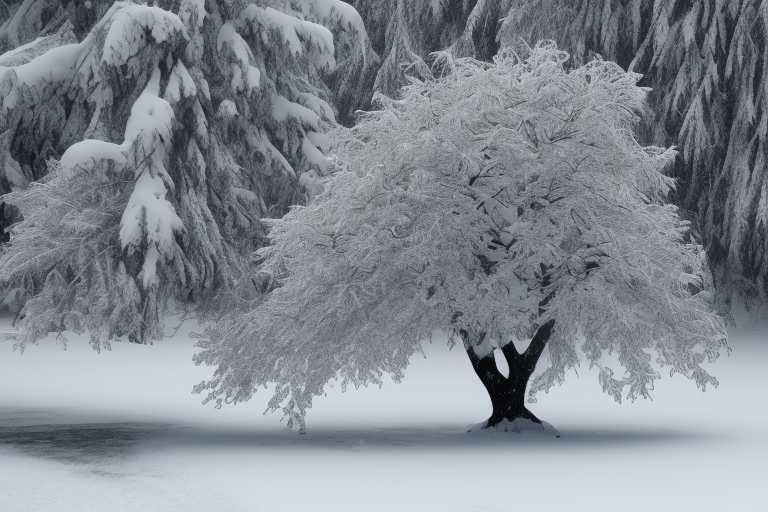

In [8]:
# start the image generation process
# Set your parameters
prompt = "winter time snow tree" #@param {type:"string"}
negative_prompt = "low quality, blurry"  #@param {type:"string"}
inference_steps = 52 #@param {type:"slider", min:0, max:240, step:1}
guidance = 6.2  #@param {type:"slider", min:0, max:20, step:0.1}
width = 768 
height = 512 

# Generate the image
image = pipe(prompt=prompt, 
             negative_prompt=negative_prompt, 
             num_inference_steps=inference_steps, 
             width=width, height=height, 
             guidance_scale=guidance).images[0]
#image.save("My_image.png")
image

Step 7 test generating multiple images


  0%|          | 0/2 [00:00<?, ?it/s]

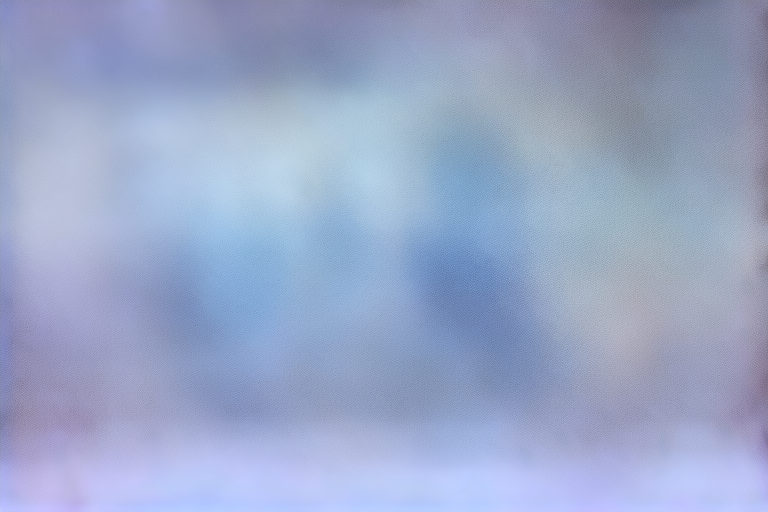

-----


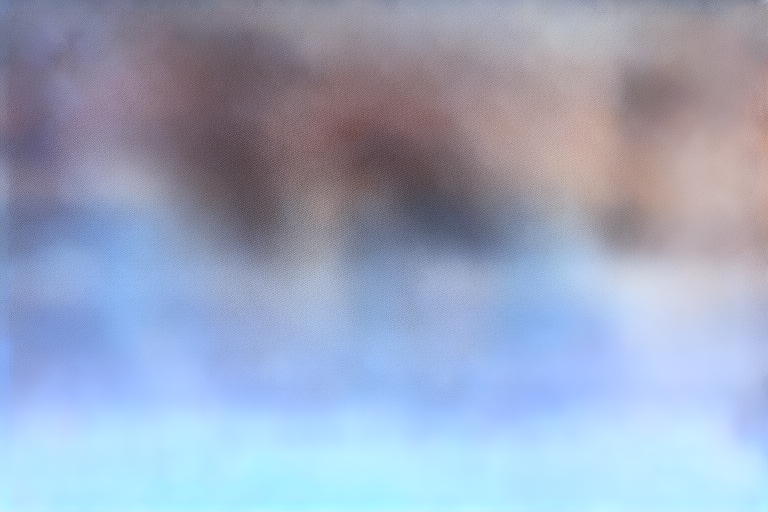

-----


In [18]:
# start the image generation process
# Set your parameters
quantity = 2 #@param {type:"integer"}
prompt = "winter time snow tree" #@param {type:"string"}
negative_prompt = "low quality, blurry"  #@param {type:"string"}
inference_steps = 2 #@param {type:"slider", min:0, max:240, step:1}
guidance = 6.2  #@param {type:"slider", min:0, max:20, step:0.1}
width = 768 
height = 512 

# Generate the image
promptlist = [prompt] * quantity
negpromptlist = [negative_prompt] * quantity
# image is a Python list with one element for each image
image = pipe(prompt=promptlist, 
             negative_prompt=negpromptlist, 
             num_inference_steps=inference_steps, 
             width=width, height=height, 
             guidance_scale=guidance).images

for img in image:
  display(img)
  print("-----")
